# Tutorial 29: Hierarchical Risk Parity (HRP) Portfolio Optimization with Constraints

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1591%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6059%,-2.5394%,...,-2.2067%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1116%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0216%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6435%,0.0000%,0.9870%,-0.1450%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%


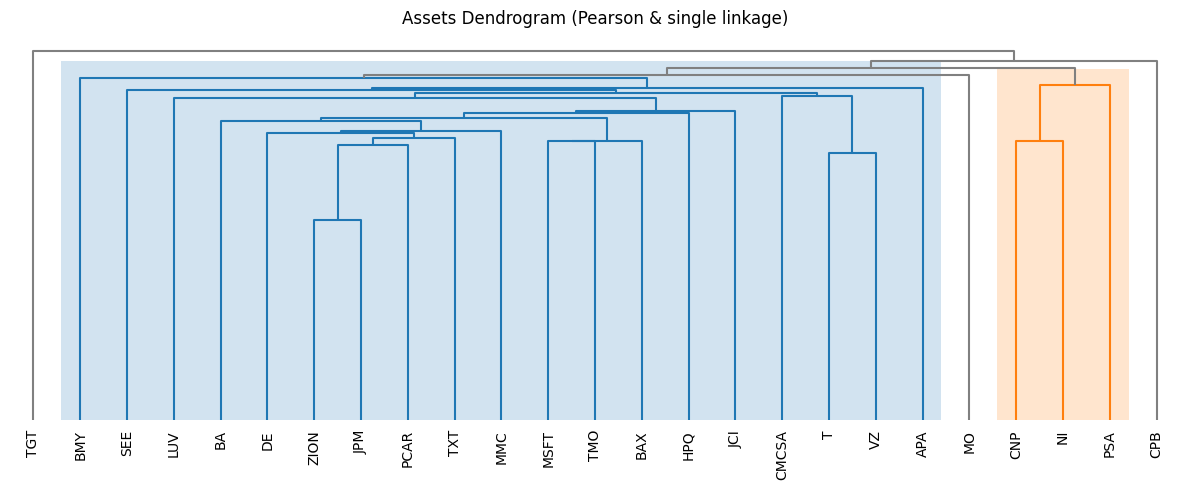

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

위의 덴드로그램은 최적의 클러스터 수가 네 개임을 시사합니다. 그러나 HRP 포트폴리오는 클러스터 수를 입력으로 사용하지 않습니다.

### 자세한 설명

**덴드로그램**:
- 덴드로그램은 계층적 클러스터링의 결과를 시각화하는 도구입니다. 데이터 포인트 간의 유사성을 기반으로 계층적으로 그룹화되는 과정을 보여줍니다.
- 덴드로그램을 분석하면, 최적의 클러스터 수를 결정할 수 있습니다. 예를 들어, 특정 높이에서 수평선을 그리면 네 개의 클러스터로 나눌 수 있는 지점을 찾을 수 있습니다.

**HRP 포트폴리오 (Hierarchical Risk Parity)**:
- HRP 포트폴리오는 자산 간의 상관관계를 기반으로 포트폴리오를 구성하는 방법입니다.
- HRP는 계층적 구조를 사용하여 자산을 분류하고, 리스크를 균등하게 분산시키기 위해 포트폴리오 가중치를 할당합니다.
- 중요한 점은 HRP 포트폴리오는 클러스터 수를 명시적으로 입력하지 않는다는 것입니다. 대신, HRP는 자산 간의 상관관계와 거리 행렬을 사용하여 자동으로 계층적 구조를 구축합니다.

### 요약
- 덴드로그램은 클러스터링의 시각적 도구로, 최적의 클러스터 수를 제안할 수 있습니다.
- HRP 포트폴리오는 클러스터 수를 입력으로 사용하지 않으며, 자산 간의 상관관계와 거리 행렬을 기반으로 계층적 구조를 형성하여 포트폴리오를 구성합니다.

### 추가 설명
덴드로그램과 HRP 포트폴리오 간의 차이점과 사용 목적을 이해하는 것이 중요합니다. 덴드로그램은 데이터의 계층적 군집화를 시각적으로 이해하는 데 도움이 되며, HRP는 이러한 군집화 정보를 바탕으로 포트폴리오를 최적화하는 데 초점을 맞추고 있습니다. 

### 예시 코드 (네트워크 플롯을 통한 시각화)
네트워크 플롯을 통해 자산 간의 관계를 시각화하고 HRP 포트폴리오의 효과를 평가하는 방법을 보여줍니다.

```python
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 상관 행렬 계산
corr_matrix = returns.corr()

# 네트워크 생성
G = nx.Graph()

# 노드 추가
for asset in asset_names:
    G.add_node(asset)

# 엣지 추가 (상관계수가 일정 임계값 이상인 경우에만 추가)
threshold = 0.5
for i in range(len(asset_names)):
    for j in range(i+1, len(asset_names)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            G.add_edge(asset_names[i], asset_names[j], weight=corr_matrix.iloc[i, j])

# 네트워크 플롯
pos = nx.spring_layout(G)  # 노드 위치를 스프링 레이아웃으로 설정
plt.figure(figsize=(12, 12))

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# 엣지 그리기 (엣지의 굵기는 상관계수의 절대값에 비례)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*5 for (u, v, d) in edges])

# 노드 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title('Asset Relationships Network')
plt.show()
```

이 예제는 자산 간의 관계를 네트워크 플롯으로 시각화하여 HRP 포트폴리오의 효과를 평가하는 방법을 보여줍니다. 상관계수가 높은 자산들은 엣지로 연결되어 가까운 거리에 위치하게 되며, 이를 통해 클러스터링의 효과를 직관적으로 파악할 수 있습니다.

## 2. Estimating HRP Portfolio

이것은 López de Prado(2016)가 제안한 원래 모델입니다. Riskfolio-Lib는 이 모델을 32개의 위험 측정치로 확장합니다.

### 자세한 설명

**원래 모델 (Original Model)**:
- López de Prado(2016)는 Hierarchical Risk Parity (HRP)라는 포트폴리오 최적화 기법을 제안했습니다. HRP는 자산 간의 상관관계를 기반으로 계층적 구조를 구성하고, 이를 통해 리스크를 균등하게 분산시키는 방법입니다.
- 이 모델은 클러스터링 기법을 사용하여 자산을 그룹화하고, 그룹 내 및 그룹 간의 리스크를 관리합니다.

**Riskfolio-Lib의 확장 (Riskfolio-Lib Expansion)**:
- Riskfolio-Lib는 López de Prado의 원래 모델을 기반으로 32개의 다양한 위험 측정치를 포함하도록 확장했습니다.
- 이러한 확장은 투자자들이 다양한 리스크 관리 전략을 사용하여 포트폴리오를 최적화할 수 있도록 합니다. 예를 들어, 평균-분산(MV), 조건부 가치-위험(CVaR), 최대 낙폭(MDD) 등의 다양한 위험 측정치를 사용할 수 있습니다.

### 위험 측정치 예시
Riskfolio-Lib에서 확장된 32개의 위험 측정치에는 다음이 포함될 수 있습니다:
1. 평균-분산 (MV: Mean-Variance)
2. 조건부 가치-위험 (CVaR: Conditional Value at Risk)
3. 최대 낙폭 (MDD: Maximum Drawdown)
4. 분산 (Variance)
5. 표준편차 (Standard Deviation)
6. 반편차 (Semi-Deviation)
7. MAD (Mean Absolute Deviation)
8. Gini's Mean Difference
9. LPM (Lower Partial Moment)
10. UPM (Upper Partial Moment)
11. Tail Gini's Mean Difference
12. Tail Mean Absolute Deviation
13. Tail Lower Partial Moment
14. Tail Upper Partial Moment
15. Regret
16. Relent

### 예제 코드 (HRP 모델 사용)
Riskfolio-Lib를 사용하여 HRP 모델을 구현하는 예제 코드입니다.

```python
import numpy as np
import pandas as pd
import riskfolio as rp

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률과 공분산 행렬 계산
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# HRP 포트폴리오 최적화
model = 'HRP'
rm = 'MV'  # 사용할 위험 측정치
obj = 'Sharpe'  # 목표 함수
hist = True  # 역사적 시나리오 사용
rf = 0  # 무위험 이자율
l = 0  # 위험 회피 계수 (유틸리티 함수에서만 사용)

# 최적 포트폴리오 계산
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 결과 출력
print("Optimal weights:\n", w.T)
```

### 코드 설명
1. **데이터 생성**: 예시 데이터를 생성하고 자산 이름을 설정합니다.
2. **포트폴리오 객체 생성**: `Portfolio` 객체를 생성하고 자산의 기대 수익률과 공분산 행렬을 계산합니다.
3. **HRP 포트폴리오 최적화**: HRP 모델을 사용하여 포트폴리오를 최적화합니다. 이 예제에서는 평균-분산(MV)을 위험 측정치로 사용하고, 샤프 비율을 최대화하는 것을 목표로 합니다.
4. **결과 출력**: 최적화된 포트폴리오 가중치를 출력합니다.

Riskfolio-Lib를 사용하면 다양한 위험 측정치를 기반으로 포트폴리오를 최적화할 수 있으며, López de Prado의 원래 HRP 모델을 더욱 확장된 형태로 적용할 수 있습니다.

### 2.1 Calculating the HRP portfolio

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model = 'HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.4534%,2.3214%,4.3891%,3.2421%,4.4245%,5.2409%,3.3767%,2.3246%,2.1718%,5.4299%,...,5.0545%,1.8952%,6.0077%,3.7508%,5.8637%,3.1666%,5.2246%,3.0513%,9.2365%,2.2744%


### 2.2 Plotting portfolio composition

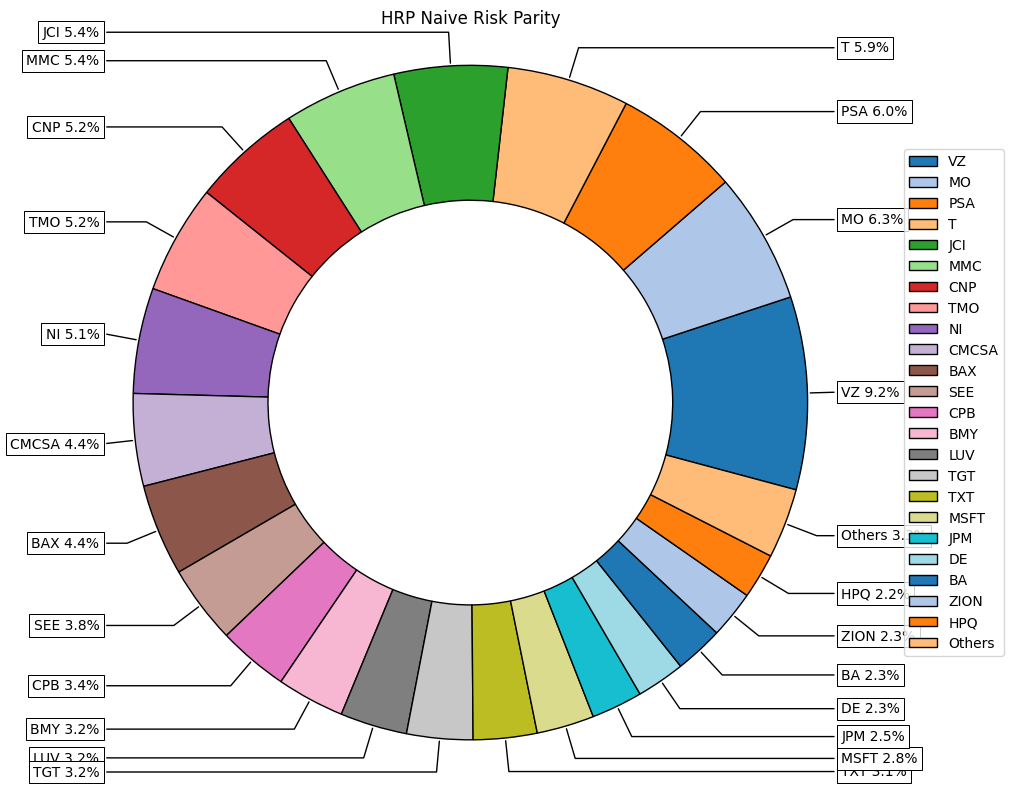

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

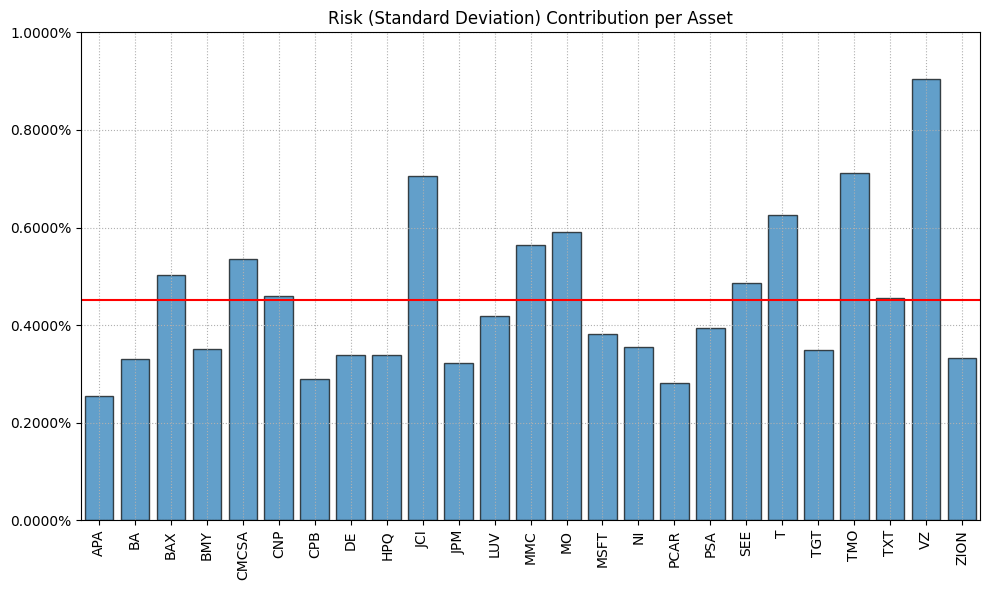

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

## 3. Estimating HRP Portfolio with Constraints

이것은 Johann Pfitzinger와 Nico Katzke(2019)가 제안한 HRP 모델의 수정본입니다.

### 자세한 설명

**원래 HRP 모델 (Original HRP Model)**:
- López de Prado(2016)는 Hierarchical Risk Parity (HRP) 포트폴리오 최적화 기법을 제안했습니다. HRP는 자산 간의 상관관계를 기반으로 계층적 구조를 구성하고, 이를 통해 리스크를 균등하게 분산시키는 방법입니다.
- 이 모델은 계층적 클러스터링을 사용하여 자산을 그룹화하고, 그룹 내 및 그룹 간의 리스크를 관리합니다.

**수정된 HRP 모델 (Modified HRP Model)**:
- Johann Pfitzinger와 Nico Katzke(2019)는 HRP 모델을 수정하여 더 나은 성능과 안정성을 제공하는 방법을 제안했습니다.
- 수정된 HRP 모델은 원래 모델의 기본 구조를 유지하면서 몇 가지 개선 사항을 추가합니다. 예를 들어, 클러스터 내 가중치를 동일하게 만드는 등의 수정이 포함될 수 있습니다.

### 예제 코드 (수정된 HRP 모델 사용)
아래는 수정된 HRP 모델을 사용하여 포트폴리오를 최적화하는 예제 코드입니다.

```python
import numpy as np
import pandas as pd
import riskfolio as rp

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률과 공분산 행렬 계산
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# HRP 포트폴리오 최적화
model = 'HRP'
rm = 'MV'  # 사용할 위험 측정치
obj = 'Sharpe'  # 목표 함수
hist = True  # 역사적 시나리오 사용
rf = 0  # 무위험 이자율
l = 0  # 위험 회피 계수 (유틸리티 함수에서만 사용)

# 최적 포트폴리오 계산
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 결과 출력
print("Optimal weights:\n", w.T)
```

### 코드 설명
1. **데이터 생성**: 예시 데이터를 생성하고 자산 이름을 설정합니다.
2. **포트폴리오 객체 생성**: `Portfolio` 객체를 생성하고 자산의 기대 수익률과 공분산 행렬을 계산합니다.
3. **HRP 포트폴리오 최적화**: HRP 모델을 사용하여 포트폴리오를 최적화합니다. 이 예제에서는 평균-분산(MV)을 위험 측정치로 사용하고, 샤프 비율을 최대화하는 것을 목표로 합니다.
4. **결과 출력**: 최적화된 포트폴리오 가중치를 출력합니다.

### HRP 모델의 수정
Pfitzinger와 Katzke의 수정된 HRP 모델은 원래 HRP 모델에 비해 몇 가지 중요한 개선점을 포함할 수 있습니다. 예를 들어:
- **클러스터 내 가중치 균등화**: 원래 HRP 모델에서 사용된 단순 위험 균형 방식 대신, 클러스터 내의 가중치를 균등하게 설정합니다.
- **클러스터 경계 최적화**: 더 나은 성능을 위해 클러스터 경계를 최적화합니다.

### 요약
Johann Pfitzinger와 Nico Katzke(2019)의 수정된 HRP 모델은 원래 HRP 모델의 기본 구조를 유지하면서도, 성능과 안정성을 개선하기 위한 몇 가지 수정 사항을 포함합니다. 이를 통해 투자자들은 더욱 효율적이고 안정적인 포트폴리오를 구성할 수 있습니다.

### 3.1 Building the HRP portfolio constraints

In [7]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['Assets', 'Assets', 'All Assets', 
                        'Each asset in a class', 'Each asset in a class'],
               'Set': ['', '', '','Industry', 'Industry'],
               'Position': ['HPQ', 'PSA', '', 'Financials', 'Information Technology'],
               'Sign': ['>=', '<=', '<=', '<=', '<='],
               'Weight': [0.01, 0.05, 0.06, 0.04, 0.02]}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight
0,False,Assets,,HPQ,>=,1.0000%
1,False,Assets,,PSA,<=,5.0000%
2,False,All Assets,,,<=,6.0000%
3,False,Each asset in a class,Industry,Financials,<=,4.0000%
4,False,Each asset in a class,Industry,Information Technology,<=,2.0000%


### 3.2 Calculating the HRP portfolio with constraints

In [8]:
# Estimate optimal portfolio with constraints:

w_max, w_min = rp.hrp_constraints(constraints, asset_classes)

port.w_max = w_max
port.w_min = w_min

w_1 = port.optimization(model=model,
                        codependence=codependence,
                        rm=rm,
                        rf=rf,
                        linkage=linkage,
                        max_k=max_k,
                        leaf_order=leaf_order)

display(w_1.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,4.9672%,2.3214%,4.5610%,3.2421%,4.4245%,5.2409%,5.3844%,2.3246%,2.0000%,5.4299%,...,5.0545%,1.8952%,4.0000%,3.7508%,5.8637%,3.1666%,5.2246%,5.2092%,6.0000%,2.2744%


### 3.3 Plotting portfolio composition

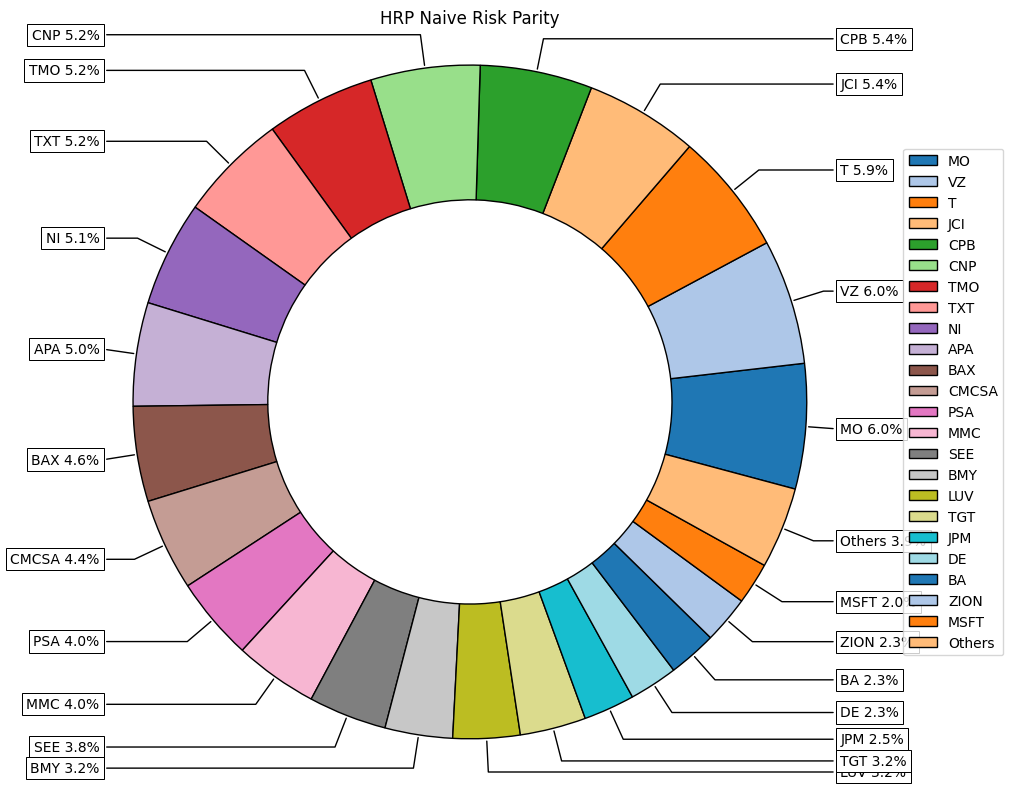

In [9]:
# Plotting the composition of the portfolio with constraints

ax = rp.plot_pie(w=w_1,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 3.4 Plotting Risk Contribution

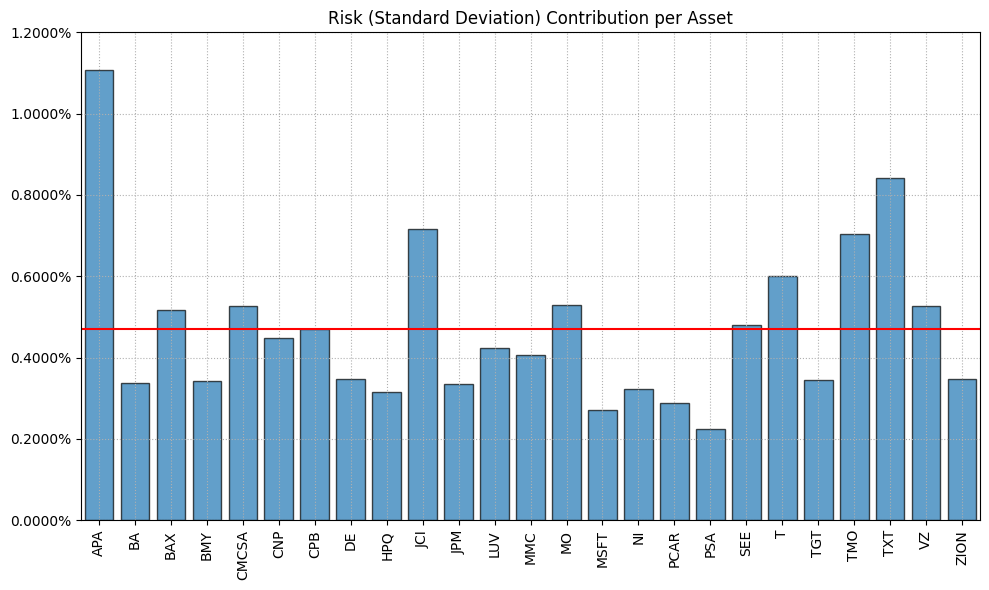

In [10]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w_1,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)